# Why scaling the data improves the performance of some models?

## Load data

In [1]:
import pandas as pd

path = '../../../data/default_credit_card/output/simplified_features.csv'
df = pd.read_csv(path)[['Income', 'YearsEmployed', 'Approved']]
df

,Income,YearsEmployed,Approved
0,0.000000,1.25,1
1,632.793678,3.04,1
...,...,...,...
687,662.007321,0.04,0
688,0.000000,8.29,0


## Feature selection

In [2]:
target = 'Approved'

y = df[target]
X = df.drop(columns=target)

## Train test split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Modelling with Support Vector Machine

### Raw data

In [4]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [5]:
score_original = {
    'test': model.score(X_test, y_test),
    'train': model.score(X_train, y_train)
}

score_original

{'test': 0.6570048309178744, 'train': 0.7074688796680498}

### Scaled data

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model_scaled = SVC(kernel='rbf')
model_scaled.fit(X_train_scaled, y_train)

SVC()

In [8]:
score_scaled = {
    'test': model_scaled.score(X_test_scaled, y_test),
    'train': model_scaled.score(X_train_scaled, y_train)
}

score_scaled

{'test': 0.714975845410628, 'train': 0.7531120331950207}

## Comparison

In [9]:
pd.DataFrame({
    'Original': score_original,
    'Scaled': score_scaled
})

,Original,Scaled
test,0.657005,0.714976
train,0.707469,0.753112


Since the Support Vector Machine (SVM) algorithm calculates distances...

<figure>
<img src="src/SVM_margin.png" alt="SVM margin" style="width: 400px;"/>
<figcaption><a href="https://commons.wikimedia.org/w/index.php?curid=73710028">By Larhmam - Own work, CC BY-SA 4.0</a></figcaption>
</figure>

It will give more importance to the features that have a higher scale:

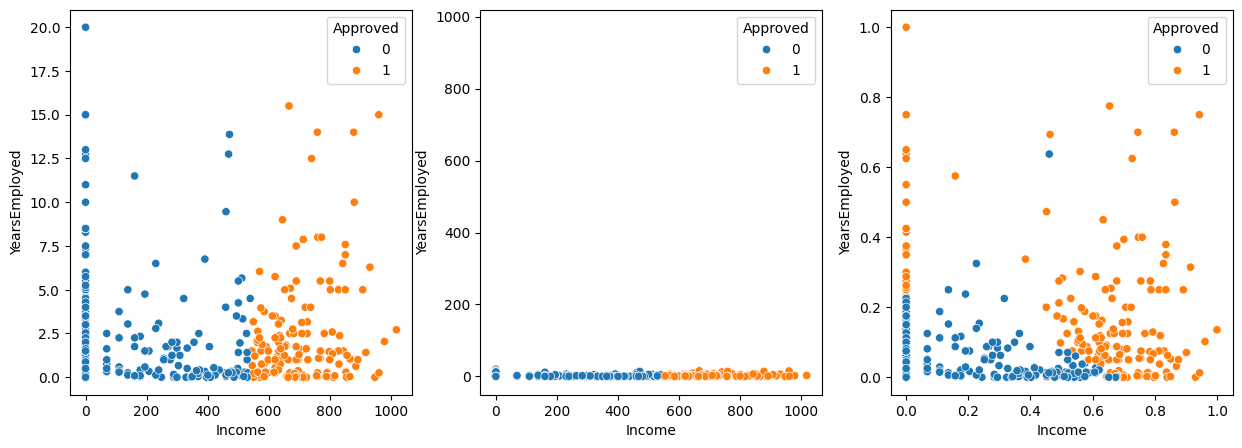

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.DataFrame(X_train).assign(Approved=model.predict(X_train))
df_scaled = (pd
 .DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
 .assign(Approved=model_scaled.predict(X_train_scaled))
 )

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df_original, x='Income', y='YearsEmployed', hue='Approved', ax=ax[0])
sns.scatterplot(data=df_original, x='Income', y='YearsEmployed', hue='Approved', ax=ax[1])

sns.scatterplot(data=df_scaled, x='Income', y='YearsEmployed', hue='Approved', ax=ax[2])

max_value = df_original[['Income', 'YearsEmployed']].max().max()
ax[1].set_ylim(-max_value*0.05, max_value)

plt.show()